In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os


In [19]:
image_name = '../../testImage1.jpg' 

image = cv2.imread(image_name)
type(image)

numpy.ndarray

In [6]:
NUM_IMAGES = 5
SIGMA = 0.005
LINE_EROSION_CONSTANT = (7, 2)

In [4]:
def process_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image - cv2.GaussianBlur(image, (21, 21), 3) + 57
    #image = cv2.bitwise_not(image)
    #image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

    """
    rows = image.shape[0]
    verticalsize = rows // 70
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    image = cv2.erode(image, verticalStructure)
    image = cv2.dilate(image, verticalStructure)
    """
    #img_blur = cv2.GaussianBlur(image, (3,3), 0) 
    #sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
    """
    median = np.median(image)
    RANGE = 15
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (image[i][j] - RANGE > median or image[i][j] + RANGE < median):
                image[i][j] = 0
    """

    return image

In [7]:
%matplotlib inline

IMAGE_PATH = "../"

for i in range(1, NUM_IMAGES + 1): 
    image_name = IMAGE_PATH + 'testImage' + str(i)
    if os.path.isfile(image_name + '.jpg'):
        image_name += '.jpg'
    else:
        image_name += '.png'

    image = cv2.imread(image_name)
    processed_image = process_image(image)

    if i == 2:
        cv2.imwrite("./testImage2_processed.png", processed_image)

    plt.figure()
    plt.imshow(processed_image, cmap='gray')

[ WARN:0@347.317] global loadsave.cpp:244 findDecoder imread_('../testImage1.png'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


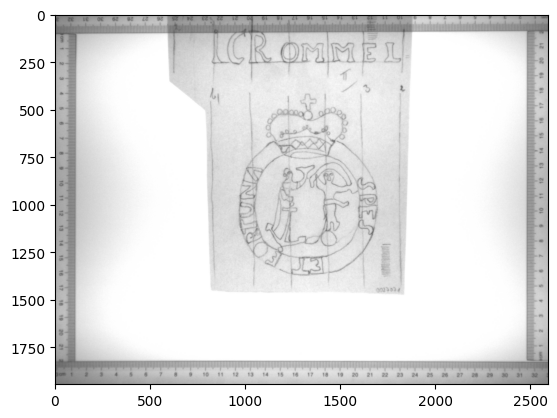

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img, (3,3), 0) 
plt.imshow(img_blur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


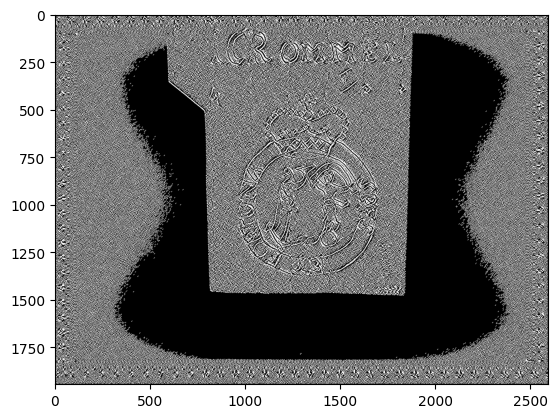

In [5]:
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

#plt.imshow(sobelx)
#plt.imshow(sobely)
plt.imshow(sobelxy)

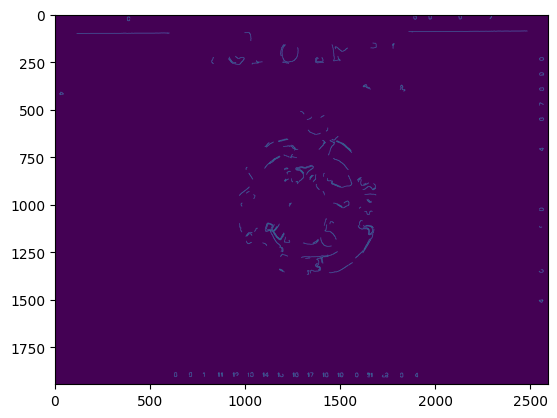

In [6]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
plt.imshow(edges)

In [4]:
import os
import json

BATCHES_PATH = "../data-annotation/"
BATCHES_FOLDERS_START = "batch-"

annotations = []
for folder in os.listdir(BATCHES_PATH):
    if (folder.startswith(BATCHES_FOLDERS_START)):
        for filename in os.listdir(BATCHES_PATH + folder):
            if (not filename.endswith(".json")):
                continue
                
            with open(BATCHES_PATH + folder + "/" + filename, "r") as f:
                annotation_batch = json.load(f)
                annotations += annotation_batch

print(len(annotations))
print([annotation["id"] for annotation in annotations])

381
381


In [68]:
print(json.dumps(annotations[227]["annotations"][0], indent=4))

{
    "id": 225,
    "completed_by": 1,
    "result": [
        {
            "value": {
                "choices": [
                    "TOW"
                ]
            },
            "id": "vxdyF9WGmG",
            "from_name": "otherOptions",
            "to_name": "image",
            "type": "choices",
            "origin": "manual"
        },
        {
            "original_width": 2592,
            "original_height": 1944,
            "image_rotation": 0,
            "value": {
                "x": 39.220419166252555,
                "y": 13.937589431689043,
                "width": 20.4698561605096,
                "height": 43.40658578061577,
                "rotation": 0,
                "rectanglelabels": [
                    "Watermark"
                ]
            },
            "id": "-Q5_mM5nVt",
            "from_name": "label",
            "to_name": "image",
            "type": "rectanglelabels",
            "origin": "manual"
        }
    ],
    "was_cancelled

ImportError: attempted relative import with no known parent package

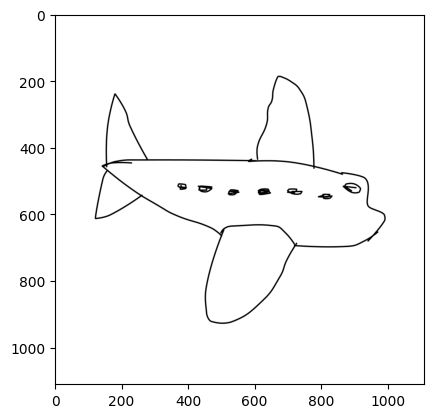

In [8]:
IMAGE_PATH = "../../data/sketches_png/png/airplane/1.png"
image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

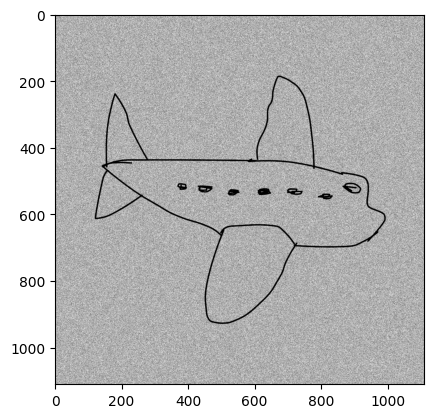

In [32]:
import random

grey_image = np.copy(image)
for i, row in enumerate(image):
    for j, pixel in enumerate(row):
        grey_image[i][j] = max(pixel - random.randint(10, 150), 0)
        
plt.imshow(grey_image, cmap='gray', vmin=0, vmax=255)

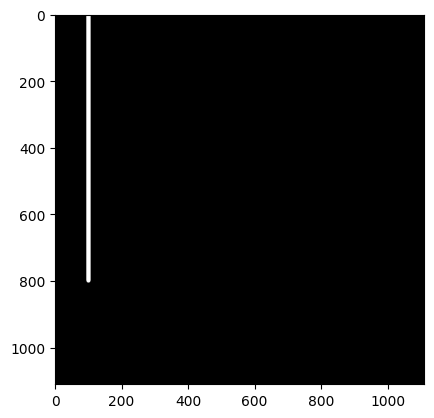

In [42]:
empty_image = np.zeros(image.shape, np.uint8)
line_image = cv2.line(empty_image, (100,0), (100, 800), (255), 12)
plt.imshow(line_image, cmap='gray', vmin=0, vmax=255)

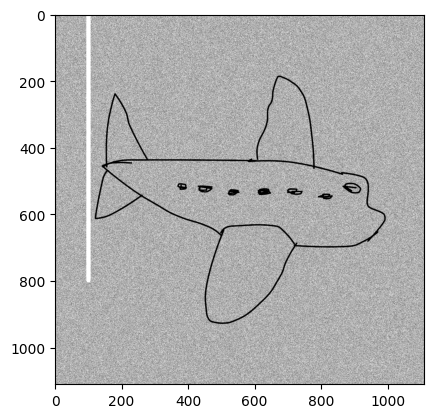

In [43]:
grey_image_with_line = cv2.bitwise_or(grey_image, line_image)
plt.imshow(grey_image_with_line, cmap='gray', vmin=0, vmax=255)

In [85]:
# Pauli's functions
import glob

def load_target_image(image_path):
    """Read target image and transform to binarized negative of sketch"""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img)
    return img


def load_comparison_watermarks(folder_path):
    """Read comparison images and transform to binarized negative of sketch"""
    images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob(folder_path + '/*.png')]

    return images

def get_contour(image, plot_contour = False):
    contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    if plot_contour == True:
        cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
        plt.axis('off')
        plt.imshow(image)
        plt.title('Identifying the Contours')
        plt.show()

    return contours

def compare_image_to_db(img_path, folder_path):
    """Compare contours and return the matching values"""
    target = load_target_image(img_path)
    target_contour = get_contour(target)
    sorted_contours = sorted(target_contour, key=cv2.contourArea, reverse=True)
    #extract the second largest contour which is the shape only
    target_contour = sorted_contours[1]
    db = load_comparison_watermarks(folder_path)

    similar_images = 0

    similarity=[]

    for image in db:
        input_contours = get_contour(image)
        sorted_input = sorted(input_contours, key=cv2.contourArea, reverse=True)
        # extract the second largest contour which is the shape only
        input_contours = sorted_input[1]
        match = cv2.matchShapes(target_contour, input_contours,3,0.0)
        similarity.append([match, image])
        #print(match)

    sorted_similarities = sorted(similarity, key=lambda x: x[0])
    simil = sorted_similarities[0]
    print('simil:',simil[0])
    cv2.drawContours(target, [target_contour], -1, (0, 255, 0), 3)
    #image = cv2.cvtColor(simil[1], cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(simil[1])
    plt.title('Best matching image')
    plt.show()
    #im_show(simil[1])

    print("Number of similar images:", similar_images)

    return similarity


IndexError: list index out of range

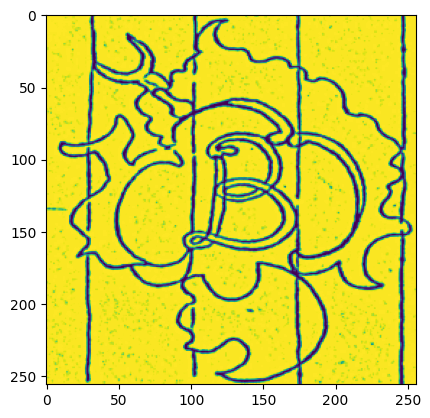

In [86]:
x = compare_image_to_db("../../target.png", "../../test-images/")
# print([y[0] for y in x])

In [78]:
image1 = cv2.imread("../../target.png", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("../../source1.png", cv2.IMREAD_GRAYSCALE)

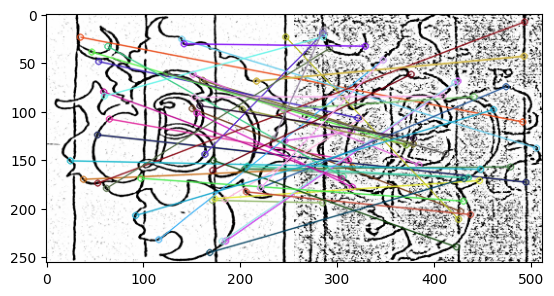

In [80]:
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
sorted_matches = sorted(matches, key=lambda x: x.distance)

output = cv2.drawMatches(image1, keypoints1, image2, keypoints2, sorted_matches[:50], image2, flags=2)
plt.imshow(output)
plt.show()

Similarities: [-0.0, -0.0, -0.0, -6.091200337539566e-12, -4.37339214549419e-05]


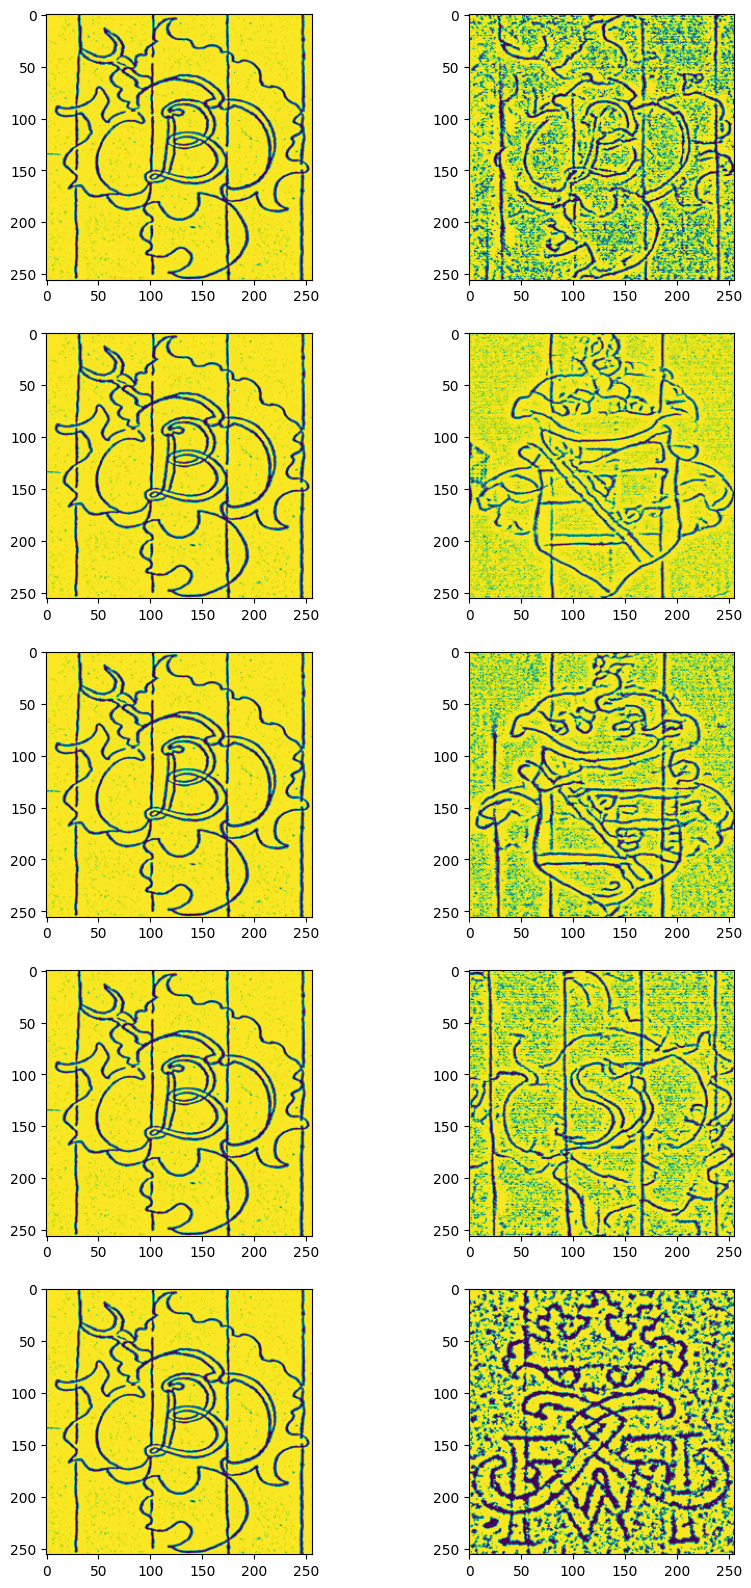

In [35]:
%run ../compare_drawings.py -i ../../target.png